In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [6]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from config import DB_USER, DB_PASSWORD, DB_SERVER_NAME, DB_DATABASE_NAME
connection_url = URL.create(
    drivername = "postgresql+pg8000", 
    username = DB_USER,
    password = DB_PASSWORD,
    host = DB_SERVER_NAME, 
    port = 5432,
    database = DB_DATABASE_NAME, 
)

In [7]:
engine = create_engine(connection_url)


In [8]:
BTC_df = pd.read_sql("btc", engine)

In [9]:
BTC_df.shape

(2715, 9)

In [10]:
BTC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2014-10-15,400.954987,402.226990,388.765991,394.773010,394.773010,25267100.0,2014-10-15,394.773010
1,2017-03-01,1180.040039,1222.500000,1179.689941,1222.500000,1222.500000,229056992.0,2017-03-01,1222.500000
2,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000.0,2014-10-16,382.556000
3,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700.0,2014-10-17,383.757996
4,2014-10-28,353.214996,359.984009,352.678986,357.618012,357.618012,7845880.0,2014-10-28,357.618012


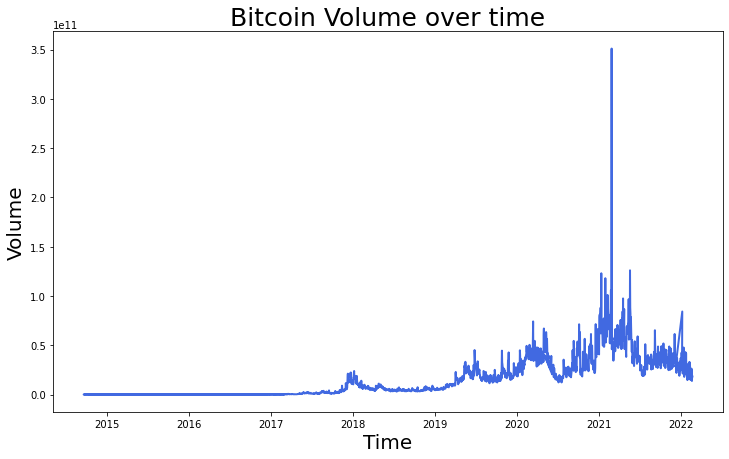

In [11]:
plt.figure(figsize = (12, 7))
plt.plot(BTC_df["Date"], BTC_df["Volume"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);
plt.show()

In [12]:
BTC_df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2710,False,False,False,False,False,False,False,False,False
2711,False,False,False,False,False,False,False,False,False
2712,False,False,False,False,False,False,False,False,False
2713,False,False,False,False,False,False,False,False,False


In [13]:
BTC_df.dropna(inplace=True)

In [14]:
BTC_df.shape

(2715, 9)

In [15]:
required_features = ['Open', 'High', 'Low', 'Volume']
output_label = 'Close'

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
BTC_df[required_features],
BTC_df[output_label],
test_size = 0.3
)

In [17]:
model = LinearRegression()
model.fit(x_test, y_test)

C:\Users\asfia\anaconda3\envs\crypto-analysis\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [18]:
model.score(x_test, y_test)

C:\Users\asfia\anaconda3\envs\crypto-analysis\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


0.9996101784682664

In [22]:
model.score(x_train,y_train)

C:\Users\asfia\anaconda3\envs\crypto-analysis\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


0.9995700196036368

In [19]:
future_set = BTC_df.shift(periods=30).tail(30)

In [20]:
prediction = model.predict(future_set[required_features])

C:\Users\asfia\anaconda3\envs\crypto-analysis\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, '$ Price')

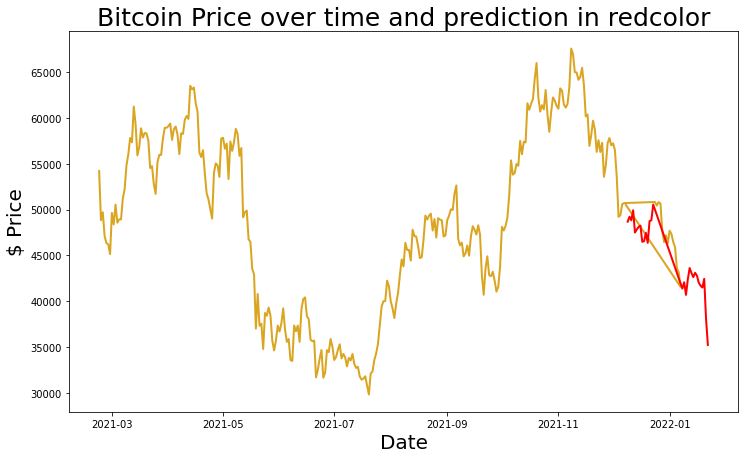

In [21]:
plt.figure(figsize = (12, 7))
plt.plot(BTC_df["Date"][-365:-60], BTC_df["Close"][-365:-60], color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='red', lw=2)
plt.title("Bitcoin Price over time and prediction in redcolor", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("$ Price", size=20)